5) Considere uma cadeia circular composta por  átomos, cada um de massa , conectados por molas idênticas de constante elástica . O sistema está sujeito a condições de contorno ou seja a primeira massa está ligada a última massa

-> Cadeia Homogênea

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp 


#Parametros
m, k, m1 = 1.0, 1.0, 5.0
N1, N2, N3 = 100, 1000, 10000

C:\Users\monteiro.ramos\AppData\Local\Temp\ipykernel_10020\566021880.py:32: RuntimeWarning: divide by zero encountered in divide
  dos_theory = (2*N1)/(np.pi * np.sqrt(w_max**2 - w_range**2))  # DOS teórico


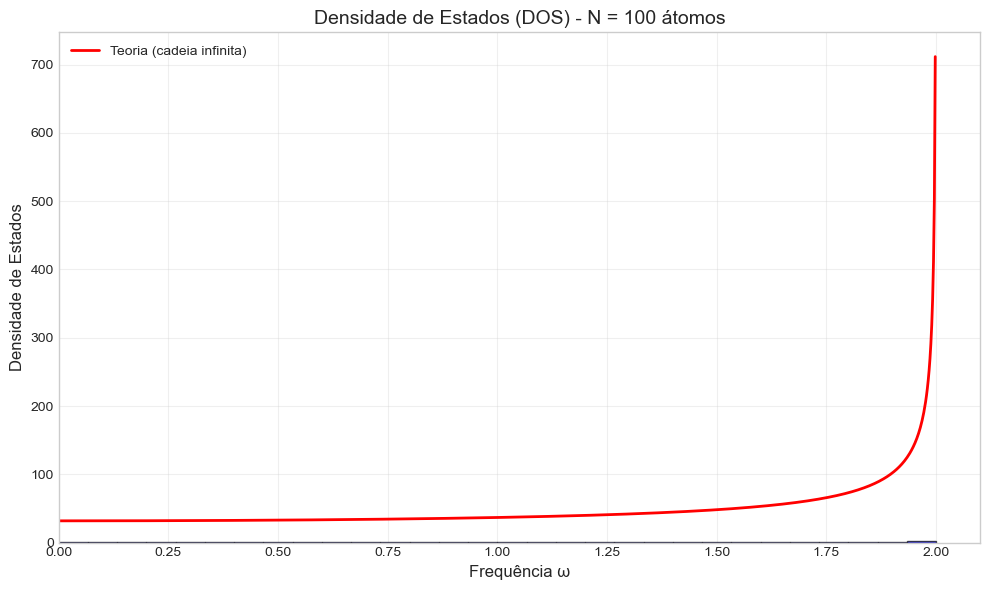

In [24]:
#Para N = 100

#matriz elastica
K = np.zeros((N1, N1))

for i in range(N1): #tamanho da cadeia
    K[i,i] = 2 * k #diagonal (massas com 2 vizinhos)
    K[i, (i - 1) % N1] = -k #vizinho anterior
    K[i, (i + 1) % N1] = -k #vizinho posterior

#matriz de massa
M = np.eye(N1) * m

ww100, v100 = sp.linalg.eigh(K, M) #autovalores (omega^2) e autovetores (modos normais)
w100 = np.sqrt(np.abs(ww100)) #frequencias naturais

# Ordenação crescente (eigh já ordena, mas é redundante)
idx = np.argsort(w100)
w100 = w100[idx]
v100 = v100[:, idx]

# Cálculo da densidade de estados (DOS)
plt.figure(figsize=(10, 6))

# Histograma de densidade
n_bins = 30
plt.hist(w100, bins=n_bins, density=True, alpha=0.7, color='blue', edgecolor='black')

# Linha teórica para cadeia infinita (referência)
w_max = 2*np.sqrt(k/m)
w_range = np.linspace(0, w_max, 1000)
dos_theory = (2*N1)/(np.pi * np.sqrt(w_max**2 - w_range**2))  # DOS teórico

plt.plot(w_range, dos_theory, 'r-', linewidth=2, label='Teoria (cadeia infinita)')

# Configurações do gráfico
plt.title(f'Densidade de Estados (DOS) - N = {N1} átomos', fontsize=14)
plt.xlabel('Frequência ω', fontsize=12)
plt.ylabel('Densidade de Estados', fontsize=12)
plt.legend()
plt.grid(alpha=0.3)
plt.xlim(0, w_max*1.05)
plt.tight_layout()
plt.show()


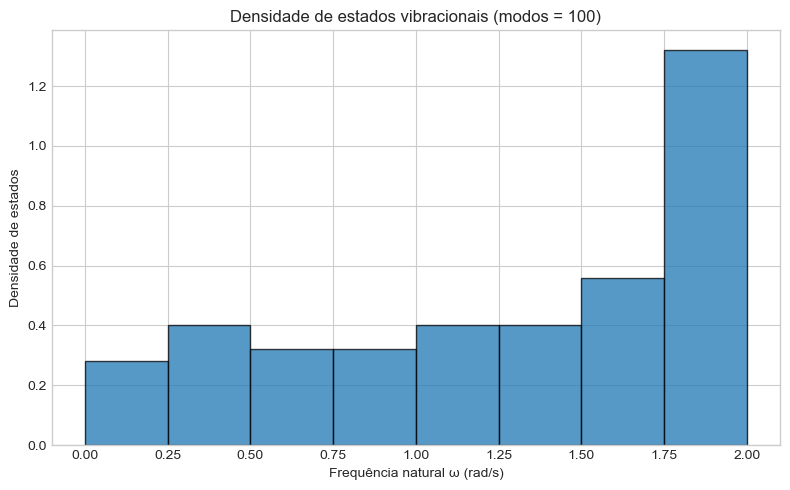

In [22]:
#grafico para N100
plt.figure(figsize=(8, 5))
plt.hist(w100, bins=8, density=True, edgecolor='black', alpha=0.75)
plt.xlabel('Frequência natural ω (rad/s)')
plt.ylabel('Densidade de estados')
plt.title('Densidade de estados vibracionais (modos = {})'.format(N1))
plt.grid(True)
plt.tight_layout()
plt.show()
